#                             Sentiment Analysis  - Majdal Hindi-300991890
                                           


## Load Libraries

In [1]:
!pip install gensim --upgrade

In [92]:
# DataFrame
import pandas as pd


# Scikit-learn
from sklearn.model_selection import train_test_split # Split Data 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Performance Metrics  

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, LSTM




# Text Preprocessing & Cleaning
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer


# Word2vec
import gensim



# Utility
import re
import numpy as np
import os
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)



# Data Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings   
from tensorflow.keras.utils import  plot_model 

warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Data 

In [4]:
#train data
df=pd.read_csv('C:\\Users\\Acc\\Desktop\\Majdal\\Machine learning\\assignment 3\\tweet_sentiment.zip')

In [5]:
df.head()

,polarity,tweet_id,tweet
0,1,2049966842,@_CrC_ WOOT! i'm great. thanks. we are the kin...
1,1,2062338304,@toytoyy ayeeee girl
2,-1,2032451037,had lovely dinner up in the drummonds. wreaked...
3,1,1993541290,Going to the USS intreped just saw ground zer...
4,-1,2204381262,Busted my ass infront of tin room tonight. Mis...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400000 entries, 0 to 1399999
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1400000 non-null  int64 
 1   tweet_id  1400000 non-null  int64 
 2   tweet     1400000 non-null  object
dtypes: int64(2), object(1)
memory usage: 32.0+ MB


## POLARITY VISUALIZATION

In [ ]:
# From the graph below we can see that the  polarity of the data is balanced 

Total number of sentiments of tweets :
-1    700011
 1    699989
Name: polarity, dtype: int64


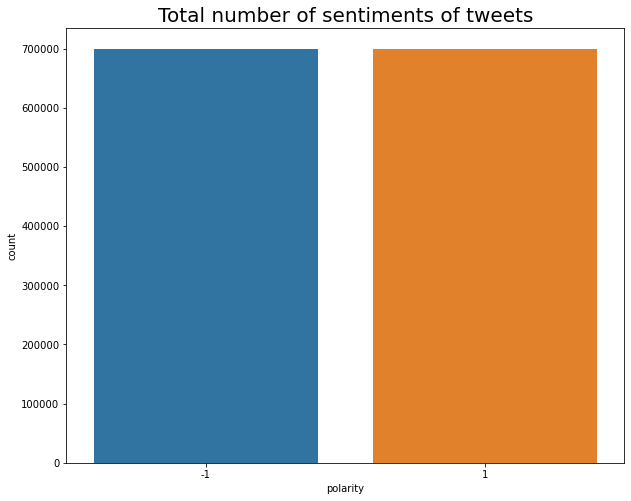

In [7]:
cprint("Total number of sentiments of tweets :",'green')
print(df.polarity.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'polarity', data = df)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

## TWEET PREPROCESSING AND CLEANING - TRAIN SET

In [93]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [94]:
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
    # Remove link,user and special characters,stop words
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [10]:
#Apply The function  on Tweets 
df["clean_tweet"] = df.tweet.apply(lambda x: preprocess(x))

In [11]:
df = df[['polarity',  'tweet','clean_tweet']]

In [12]:
#Result
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(df.head(10))

,polarity,tweet,clean_tweet
0,1,@_CrC_ WOOT! i'm great. thanks. we are the kind eyes sisters from niagara &amp; the boat! hope u &amp; ur lady are good! have fun 2night!,woot great thanks kind eyes sisters niagara amp boat hope u amp ur lady good fun 2night
1,1,@toytoyy ayeeee girl,ayeeee girl
2,-1,"had lovely dinner up in the drummonds. wreaked, wanna go to bed but can't have to study for irish p2 &amp; geog. i hate the junior cert! &gt;",lovely dinner drummonds wreaked wanna go bed study irish p2 amp geog hate junior cert gt
3,1,Going to the USS intreped just saw ground zero :..(,going uss intreped saw ground zero
4,-1,Busted my ass infront of tin room tonight. Miss my baby. annnnnd it was a good night with lee and adam! ;) goodnight. 2pm twin peaks!!,busted ass infront tin room tonight miss baby annnnnd good night lee adam goodnight 2pm twin peaks
5,-1,This video was kinda sad. @DJhiro this video is awesome! @minimalcha It was. I meant the ending was kinda sad ? http://blip.fm/~5efgy,video kinda sad djhiro video awesome minimalcha meant ending kinda sad
6,1,Crazy how the landscape changes from yellow to dark green,crazy landscape changes yellow dark green
7,1,http://twitpic.com/6gdq5 - Still at steel panther,still steel panther
8,1,Saved By the Bell &amp; Nutella !!! what a way to start a beautiful morning,saved bell amp nutella way start beautiful morning
9,-1,"ahhh i have my window open and the blinds, the sky looks weirddd. Hmm",ahhh window open blinds sky looks weirddd hmm


## Split Tweet Of Sentiments to Positive Tweets and Negative Tweets

In [13]:
positive=df[df['polarity']==1].clean_tweet
negative=df[df['polarity']==-1].clean_tweet

In [14]:
positive.head()

0    woot great thanks kind eyes sisters niagara am...
1                                          ayeeee girl
3                   going uss intreped saw ground zero
6            crazy landscape changes yellow dark green
7                                  still steel panther
Name: clean_tweet, dtype: object

In [15]:
negative.head()

2     lovely dinner drummonds wreaked wanna go bed s...
4     busted ass infront tin room tonight miss baby ...
5     video kinda sad djhiro video awesome minimalch...
9         ahhh window open blinds sky looks weirddd hmm
10                              ewwww im tired creepers
Name: clean_tweet, dtype: object

## World Cloud of Postive Sentiments

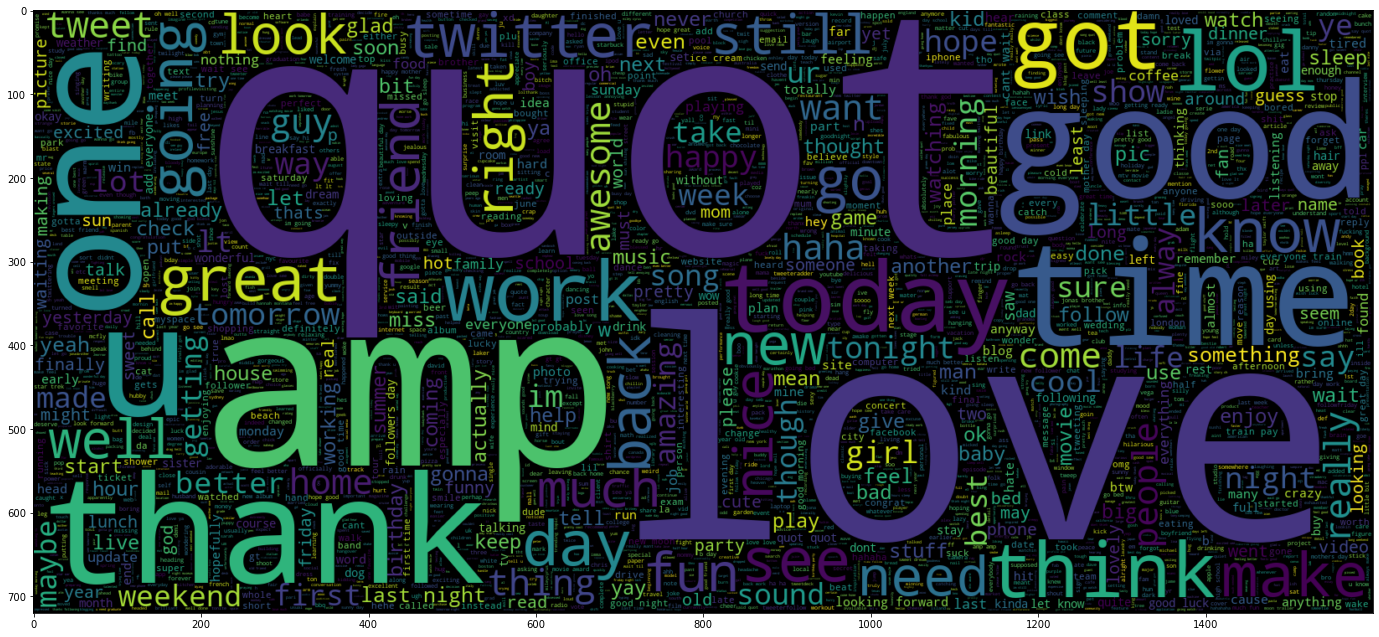

In [16]:
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

## World Cloud of Negative Sentiments

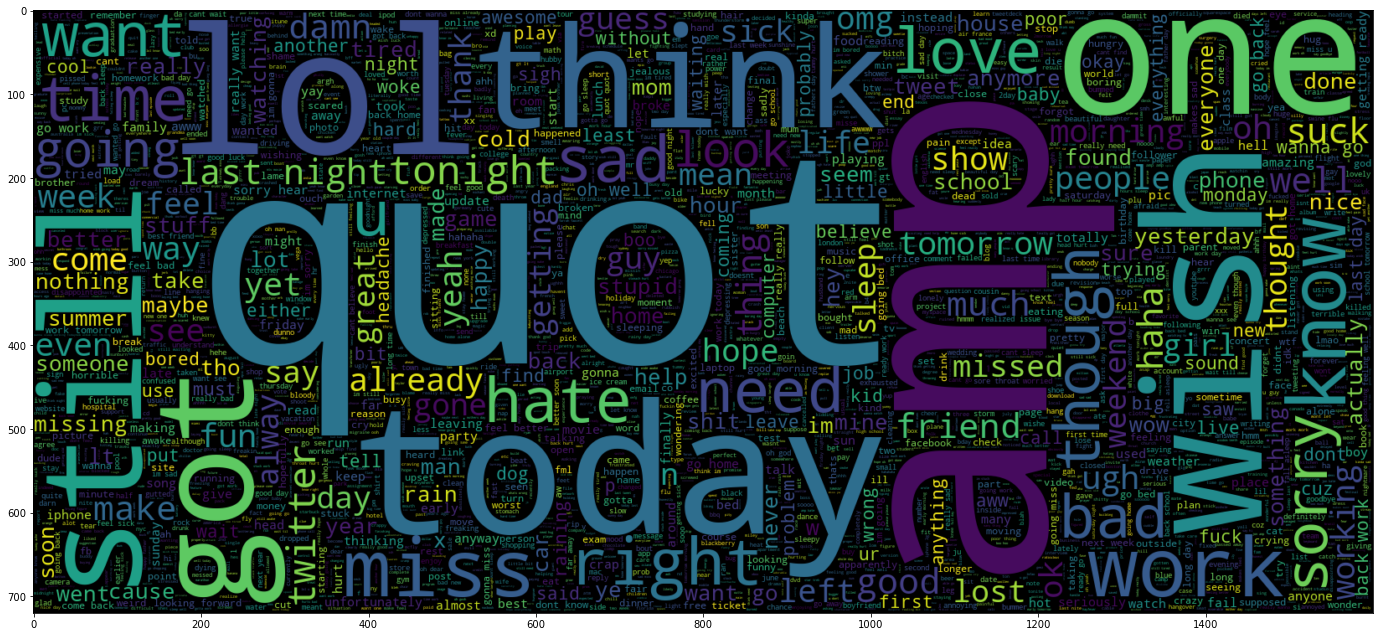

In [17]:
plt.figure(figsize = (24,12)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

## Split Data into Train & Test sets

In [18]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [19]:
print("TRAIN size:", df_train.shape)
print("TEST size:", df_test.shape)

TRAIN size: (1120000, 3)
TEST size: (280000, 3)


#  Word2Vec Approach

## Split each document into words

In [20]:
documents = [_clean_tweet.split() for _clean_tweet in df_train.clean_tweet] 

In [21]:
documents[:10]

[['yaaay', 'howi', 'met', 'ur', 'mother', 'gonna', 'start', 'im'],
 ['fuck', 'metal', 'gear', 'solid', 'rising', '360', 'fuck'],
 ['eventually', 'time', 'follower'],
 ['cudnt',
  'get',
  'tickets',
  'premier',
  'il',
  'stil',
  'come',
  'see',
  'red',
  'carpet',
  'cant',
  'wait'],
 ['hmm', 'wana', 'see', 'britney', 'spears', 'shes', 'freak', 'haha'],
 ['7',
  '8',
  'accident',
  'lame',
  'ever',
  'since',
  'owner',
  'disclose',
  'many',
  'details'],
 ['yay', 'always', 'wanted', 'sick', 'end', 'sarcasim'],
 ['one', 'dedicated', 'people', 'everr', 'mr', 'ingles', 'biggest', 'fan'],
 ['anjrit', 'mimpinya'],
 ['thinking', 'burgers', 'grill', 'tonight']]

## Build Word2Vec Model

In [22]:
#Build The Model
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)

2022-01-05 14:32:41,602 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=300, alpha=0.025)', 'datetime': '2022-01-05T14:32:41.602064', 'gensim': '4.1.2', 'python': '3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.17763-SP0', 'event': 'created'}


In [23]:
#Build vocab 
w2v_model.build_vocab(documents)

2022-01-05 14:32:41,614 : INFO : collecting all words and their counts
2022-01-05 14:32:41,614 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-01-05 14:32:41,624 : INFO : PROGRESS: at sentence #10000, processed 72128 words, keeping 14032 word types
2022-01-05 14:32:41,654 : INFO : PROGRESS: at sentence #20000, processed 144587 words, keeping 21606 word types
2022-01-05 14:32:41,678 : INFO : PROGRESS: at sentence #30000, processed 216734 words, keeping 27568 word types
2022-01-05 14:32:41,702 : INFO : PROGRESS: at sentence #40000, processed 289062 words, keeping 32835 word types
2022-01-05 14:32:41,724 : INFO : PROGRESS: at sentence #50000, processed 360938 words, keeping 37736 word types
2022-01-05 14:32:41,745 : INFO : PROGRESS: at sentence #60000, processed 432722 words, keeping 42163 word types
2022-01-05 14:32:41,768 : INFO : PROGRESS: at sentence #70000, processed 505422 words, keeping 46351 word types
2022-01-05 14:32:41,793 : INFO : PROGRESS: at s

## Explore the Model

In [24]:
words = w2v_model.wv.index_to_key
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 28116


In [25]:
print(f"Size of the corpus: {w2v_model.corpus_count}. Total number of words: {w2v_model.corpus_total_words}")
print(f"Vector size: {w2v_model.vector_size}. Dictionary size: {len(w2v_model.wv)}")
print(f"vector size: {w2v_model.syn1neg.shape} or {w2v_model.wv.vectors.shape}")

Size of the corpus: 1120000. Total number of words: 8075067
Vector size: 300. Dictionary size: 28116
vector size: (28116, 300) or (28116, 300)


## Train The Model

In [26]:
w2v_model.train(documents, total_examples=len(documents), epochs=32)

2022-01-05 14:32:44,755 : INFO : Word2Vec lifecycle event {'msg': 'training model with 8 workers on 28116 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=7 shrink_windows=True', 'datetime': '2022-01-05T14:32:44.755541', 'gensim': '4.1.2', 'python': '3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.17763-SP0', 'event': 'train'}
2022-01-05 14:32:45,766 : INFO : EPOCH 1 - PROGRESS: at 13.74% examples, 980579 words/s, in_qsize 15, out_qsize 0
2022-01-05 14:32:46,791 : INFO : EPOCH 1 - PROGRESS: at 28.72% examples, 1019075 words/s, in_qsize 14, out_qsize 1
2022-01-05 14:32:47,800 : INFO : EPOCH 1 - PROGRESS: at 43.84% examples, 1033672 words/s, in_qsize 14, out_qsize 1
2022-01-05 14:32:48,828 : INFO : EPOCH 1 - PROGRESS: at 58.68% examples, 1037991 words/s, in_qsize 15, out_qsize 0
2022-01-05 14:32:49,849 : INFO : EPOCH 1 - PROGRESS: at 71.66% examples, 1011747 words/s, in_qsize 15, out_qsize 0
2022-01-05 14:32:50,

(229643526, 258402144)

## Check The Model Performance

In [27]:
w2v_model.wv.most_similar("love")

[('luv', 0.5893771648406982),
 ('loves', 0.5482416152954102),
 ('loved', 0.5205196142196655),
 ('adore', 0.5182650089263916),
 ('amazing', 0.5024497509002686),
 ('looove', 0.48904043436050415),
 ('looooove', 0.4561765491962433),
 ('loveee', 0.448347270488739),
 ('loove', 0.43491554260253906),
 ('loooove', 0.43292999267578125)]

In [28]:
w2v_model.wv.most_similar("terrible")

[('horrible', 0.6836971640586853),
 ('awful', 0.6123705506324768),
 ('bad', 0.5211880207061768),
 ('horrid', 0.4966905415058136),
 ('crappy', 0.43292585015296936),
 ('worst', 0.39123404026031494),
 ('horrific', 0.3899424970149994),
 ('miserable', 0.384357750415802),
 ('good', 0.3840210735797882),
 ('nauseated', 0.3776368498802185)]

In [29]:
w2v_model.wv.most_similar("hate")

[('hates', 0.5372013449668884),
 ('sucks', 0.481956422328949),
 ('suck', 0.47799232602119446),
 ('stupid', 0.4747329354286194),
 ('hating', 0.4485836923122406),
 ('ugh', 0.42559751868247986),
 ('h8', 0.4175684154033661),
 ('dislike', 0.4158898591995239),
 ('despise', 0.4105556309223175),
 ('loathe', 0.39085039496421814)]

In [30]:
w2v_model.wv.most_similar("beautiful")

[('gorgeous', 0.7493684887886047),
 ('lovely', 0.6300788521766663),
 ('wonderful', 0.5573288202285767),
 ('glorious', 0.5285350680351257),
 ('fabulous', 0.5122255682945251),
 ('stunning', 0.4938637912273407),
 ('perfect', 0.48910731077194214),
 ('beautifull', 0.4802146553993225),
 ('nice', 0.4658738374710083),
 ('amazing', 0.43773531913757324)]

In [117]:
w2v_model.wv.most_similar("sick")

[('tired', 0.5305358171463013),
 ('sicky', 0.48861268162727356),
 ('dizzy', 0.4827483296394348),
 ('flu', 0.4823332726955414),
 ('sicker', 0.4776589274406433),
 ('nauseous', 0.4775184094905853),
 ('unwell', 0.4700583517551422),
 ('sleepy', 0.4623667001724243),
 ('fever', 0.46110063791275024),
 ('bronchitis', 0.4591998755931854)]

In [120]:
w2v_model.wv.most_similar("bf")

[('boyfriend', 0.5601390600204468),
 ('bff', 0.5018128752708435),
 ('gf', 0.4635408818721771),
 ('dad', 0.44811171293258667),
 ('mom', 0.44625768065452576),
 ('bestie', 0.41142576932907104),
 ('hubby', 0.40281346440315247),
 ('friend', 0.40227892994880676),
 ('friends', 0.3777191936969757),
 ('sister', 0.3774113059043884)]

## Tokenize Tweets

In [31]:
#Tokenize Tweet

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.clean_tweet)


vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)


Total words 266687


In [32]:
#words dictionary
tokenizer.word_index

{'good': 1,
 'day': 2,
 'get': 3,
 'like': 4,
 'go': 5,
 'quot': 6,
 'today': 7,
 'work': 8,
 'love': 9,
 'going': 10,
 'got': 11,
 'lol': 12,
 'time': 13,
 'back': 14,
 'u': 15,
 'one': 16,
 'know': 17,
 'im': 18,
 'really': 19,
 'amp': 20,
 'see': 21,
 'still': 22,
 'night': 23,
 '2': 24,
 'well': 25,
 'new': 26,
 'want': 27,
 'think': 28,
 'home': 29,
 'thanks': 30,
 'oh': 31,
 'much': 32,
 'miss': 33,
 'need': 34,
 'last': 35,
 'morning': 36,
 'tomorrow': 37,
 'hope': 38,
 'great': 39,
 'twitter': 40,
 '3': 41,
 'haha': 42,
 'feel': 43,
 'sad': 44,
 'fun': 45,
 'wish': 46,
 'right': 47,
 'sleep': 48,
 'bad': 49,
 'would': 50,
 'happy': 51,
 'sorry': 52,
 'tonight': 53,
 'come': 54,
 'make': 55,
 'way': 56,
 'getting': 57,
 'gonna': 58,
 'though': 59,
 'nice': 60,
 'better': 61,
 'watching': 62,
 'yeah': 63,
 'wait': 64,
 'bed': 65,
 'could': 66,
 'week': 67,
 'people': 68,
 'school': 69,
 'hate': 70,
 'even': 71,
 'days': 72,
 'hey': 73,
 '4': 74,
 'yes': 75,
 'next': 76,
 'lt': 77

# pad_sequences

pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence
https://medium.com/@canerkilinc/padding-for-nlp-7dd8598c916a

In [33]:
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.tweet), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.tweet), maxlen=300)

In [34]:
x_train [0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [35]:
x_test[-1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [36]:
print("x_train", x_train.shape)
print()
print("x_test", x_test.shape)

x_train (1120000, 300)

x_test (280000, 300)


## Label Encoder

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
https://medium.com/@canerkilinc/padding-for-nlp-7dd8598c916a

In [37]:
encoder = LabelEncoder()
encoder.fit(df_train.polarity.tolist())

y_train = encoder.transform(df_train.polarity.tolist())
y_test = encoder.transform(df_test.polarity.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (1120000, 1)
y_test (280000, 1)


In [38]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (1120000, 300)
y_train (1120000, 1)

x_test (280000, 300)
y_test (280000, 1)


In [39]:
y_train[:10]

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1]], dtype=int64)

In [40]:
y_test[:10]

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0]], dtype=int64)

In [41]:
x_train[:10]

array([[    0,     0,     0, ...,    58,   166,    18],
       [    0,     0,     0, ...,  6670,  2549,   376],
       [    0,     0,     0, ...,  2735,    13,  1402],
       ...,
       [    0,     0,     0, ..., 28117,  1671,   464],
       [    0,     0,     0, ...,     0, 96537, 52148],
       [    0,     0,     0, ...,  4193,  3357,    53]])

In [42]:
x_test[:10]

array([[    0,     0,     0, ...,   256,   289, 75218],
       [    0,     0,     0, ...,     1,     4,  1325],
       [    0,     0,     0, ...,   121,   280,   302],
       ...,
       [    0,     0,     0, ...,     0,    38,    25],
       [    0,     0,     0, ...,   939,  1409,   415],
       [    0,     0,     0, ...,  4217,  3476,    59]])

## Define The MLP Model

We will create a simple MLP network with the following layout:

Input layer: embedding_layer 300 

dropout layer : p=0.5

Hidden layer 1: LSTM layer  100  dropout=0.2, recurrent_dropout=0.2

Output layer: 1  with Sigmoid Activation

## Build Embedding layer

Embedding is a way to create a dense vector representation out of the sparse representations. It is of a lower dimension and helps to capture much more informations. It more like captures the relation and similarities between words using how they appear close to each other. For example, king, queen, men and women will have some relations.

The embedding layers see how the words are used, i.e, it tries to see if two words always occur together or are used in contrast. After judging all these factors the layer places the word in a position one the n-dimensional embedding space.

In this method, the words are individually represented as a vector.where the index corresponding to specific word will be equal to 1, and others will be 0

The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

=> embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300)

1. input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.In our case: vocab size = 266687

2. output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.In our case = 300

3. input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.In our case = 300


https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [44]:
embedding_matrix = np.zeros((vocab_size,300))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(266687, 300)


In [45]:
embedding_matrix[1500]

array([-1.33620739,  0.10495284, -0.49596387, -2.08428359,  0.33538195,
        0.46395025, -0.40200138,  0.42352292, -1.90592897,  0.30818498,
       -0.92984802,  0.02286077, -0.69058889, -0.4466114 , -1.69666135,
        1.83235478, -1.19622993,  1.25871849,  1.36550629,  0.25725487,
        0.20047578,  0.79524761,  0.95379353,  0.80770856,  1.48011529,
        1.0169636 , -0.2479593 ,  0.61648875,  0.54058665,  0.99690741,
       -1.26793456, -1.11409175,  0.25780708, -0.66303545, -0.24886674,
        1.12079203, -1.73322165,  0.13176031, -2.10698414,  0.68226033,
        0.9587782 , -0.02480342,  0.71451014,  0.01225359, -0.58066761,
       -0.14908572,  0.69299245, -1.32941079,  0.13273342, -1.10757983,
       -0.1591081 ,  0.50072712, -1.2792654 ,  0.26744762, -0.3246589 ,
       -1.86301708,  0.71429628,  0.0508441 ,  0.01746974, -0.42600146,
        2.19163513, -1.32073092, -0.39117292, -0.08967516, -0.82242996,
       -1.75463235,  0.50549006,  0.19290128,  0.32038242,  1.24

In [46]:
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300)

In [47]:
embedding_layer

# LSTM layer

LSTM (short for long short-term memory) primarily solves the vanishing gradient problem in backpropagation. LSTMs use a gating mechanism that controls the memoizing process. Information in LSTMs can be stored, written, or read via gates that open and close. These gates store the memory in the analog format, implementing element-wise multiplication by sigmoid ranges between 0-1. Analog, being differentiable in nature, is suitable for backpropagation.
https://www.pluralsight.com/guides/introduction-to-lstm-units-in-rnn

# Build The Model

In [48]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          80006100  
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 80,166,601
Trainable params: 80,166,601
Non-trainable params: 0
_________________________________________________________________


## Compile model

In [49]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

## Plot Model

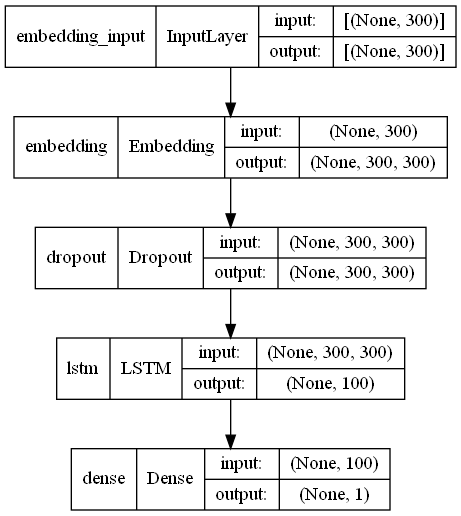

In [50]:
plot_model(model, show_layer_names = True, show_shapes = True)

## Train Model

In [51]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=1024,
                    epochs=8,
                    validation_split=0.1,
                    verbose=1
                    )

Epoch 1/8
985/985 [==============================] - 17269s 18s/step - loss: 0.4959 - accuracy: 0.7564 - val_loss: 0.4571 - val_accuracy: 0.7857
Epoch 2/8
985/985 [==============================] - 16829s 17s/step - loss: 0.4559 - accuracy: 0.7832 - val_loss: 0.4475 - val_accuracy: 0.7922
Epoch 3/8
985/985 [==============================] - 16846s 17s/step - loss: 0.4278 - accuracy: 0.8007 - val_loss: 0.4564 - val_accuracy: 0.7926
Epoch 4/8
985/985 [==============================] - 17501s 18s/step - loss: 0.4006 - accuracy: 0.8167 - val_loss: 0.4653 - val_accuracy: 0.7898
Epoch 5/8
985/985 [==============================] - 19860s 20s/step - loss: 0.3811 - accuracy: 0.8272 - val_loss: 0.4793 - val_accuracy: 0.7867
Epoch 6/8
985/985 [==============================] - 18248s 19s/step - loss: 0.3671 - accuracy: 0.8344 - val_loss: 0.4946 - val_accuracy: 0.7839
Epoch 7/8
985/985 [==============================] - 17726s 18s/step - loss: 0.3562 - accuracy: 0.8392 - val_loss: 0.5137 - val_ac

## Evaluate Model 

In [53]:
#on train test
train_score=model.evaluate(x_train,y_train)
train_score

35000/35000 [==============================] - 2629s 75ms/step - loss: 0.3318 - accuracy: 0.8556


[0.3318297564983368, 0.8556446433067322]

In [52]:
#on test set
test_score=model.evaluate(x_test,y_test)
test_score

8750/8750 [==============================] - 660s 75ms/step - loss: 0.5221 - accuracy: 0.7833


[0.5220988988876343, 0.7833285927772522]

# VISUALIZE MODEL PERFORMENCE ON TRAIN SET


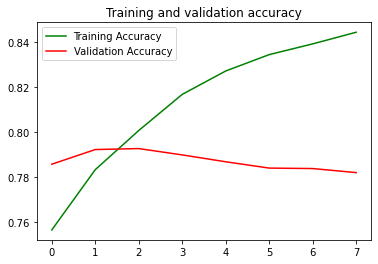

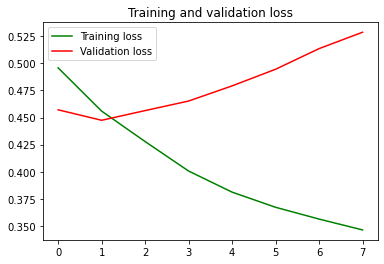

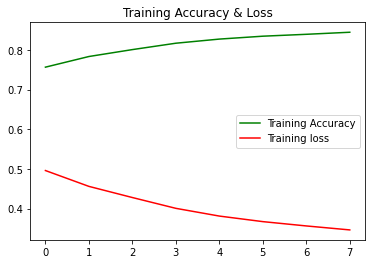

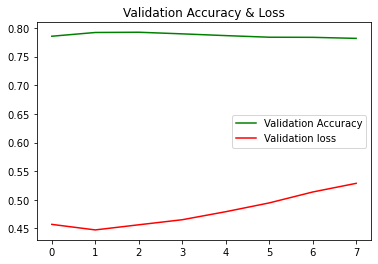

In [122]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'g', label='Training Accuracy')
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Accuracy & Loss')
plt.legend()
 
plt.show()

plt.figure()

plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Validation Accuracy & Loss')
plt.legend()


# Label the sentiment by score

In [56]:
# label the sentiment= 1 (positive tweet) if the score > 0.5, label the sentiment -1 (negative tweet) if the score <=0.5
def decode_sentiment(score):
    if score <= 0.5:
        label = -1
    elif score > 0.5:
        label = 1
    return label

In [127]:
#predict function: to predict unseen tweets by tokenize the input data, return the score by the model , label the score 1 or -1 
def predict(text):
    
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=300)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score)

    return {"label": label, "score": float(score)}  

# Examples to Predict

In [128]:
predict("I feel bad")

{'label': -1, 'score': 0.12757611274719238}

In [140]:
predict("I hate you")

{'label': -1, 'score': 0.4484243392944336}

In [141]:
predict("i don't know what to do")

{'label': -1, 'score': 0.2660844326019287}

In [131]:
predict("i love it")

{'label': 1, 'score': 0.931273341178894}

In [132]:
predict("i can't wait")

{'label': 1, 'score': 0.6992245316505432}

In [133]:
predict("exciting")

{'label': 1, 'score': 0.7235288619995117}

In [134]:
predict("ops")

{'label': -1, 'score': 0.20277583599090576}

In [142]:
predict("la la land")

{'label': 1, 'score': 0.5257128477096558}

# Predictions on Test Set

In [69]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.polarity)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score) for score in scores]

35/35 [==============================] - 389s 11s/step
Wall time: 6min 29s


In [107]:
#add predicted polarity columns to the test set, to compare the result with the actual polarity
final=pd.DataFrame (y_pred_1d, columns = ['Predicted_Polarity'])

In [150]:
test_df['Predicted_Polarity']=final

In [151]:
test_df.head(20)

,tweet_id,tweet,clean_tweet,polarity,Predicted_Polarity
0,1557375693,"@conkerjo The voice of reason says fix it, bec...",voice reason says fix come back bite arse launch,1,-1
1,2193820060,@slmar #lawnmothering Its been raining all mo...,lawnmothering raining morning good call turtle...,1,-1
2,2176629873,Walking with ma brothers now,walking brothers,-1,1
3,1963869593,@candicotton not so good,good,1,1
4,1469943723,had an interesting night to say the least,interesting night say least,1,1
5,2283293318,@lilstanleymama I hardly see her anymore like ...,hardly see anymore like moved,1,1
6,2065993609,just came from spa,came spa,-1,1
7,1565260664,@MissPrecious2 how come?,come,1,1
8,2190136534,The sadness : 'agent' Nayedene &amp; I thought...,sadness agent nayedene amp thought turns scam ...,1,-1
9,2066828169,"Just woke up, going to the beach and stuff",woke going beach stuff,1,-1


In [152]:
test_df.tail(20)

,tweet_id,tweet,clean_tweet,polarity,Predicted_Polarity
199980,1692257508,@scotsmanstuart well....you should be home now...,well home woot still sick seem shake hanging,1,-1
199981,1995594916,@snarkylady Dollar Tree w/ child in tow will d...,dollar tree w child tow every time,-1,-1
199982,1552035680,@Hapson @PaulDale67 it's coming along nicely I...,pauldale67 coming along nicely part well keepi...,1,1
199983,2245572684,@ncullura I know the old him is dead and gone...,know old dead gone,-1,-1
199984,2014990177,@siwhitehouse I'll let you know when I've fi...,let know finished season 1,1,-1
199985,1835283155,@paulakahumbu thought #geocashe had something ...,thought geocashe something geocoding mapping apps,1,-1
199986,2176400518,@RaraACTIVE hehee. and whens your next chapter...,hehee whens next chapter,1,1
199987,2061711702,Escutando We All Rock Along - The Maine. E ten...,escutando rock along maine e tentando fazer me...,-1,-1
199988,1824505078,@Rawrrgasmic thankfully that has never happene...,thankfully never happened imagine weird situat...,1,1
199989,2055354661,@Rob_Kemp searched everywhere I can think of m...,searched everywhere think mate nothing,-1,-1


# VISUALIZE MODEL PERFORMENCE ON TEST SET (Confusion Matrix)

In [70]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

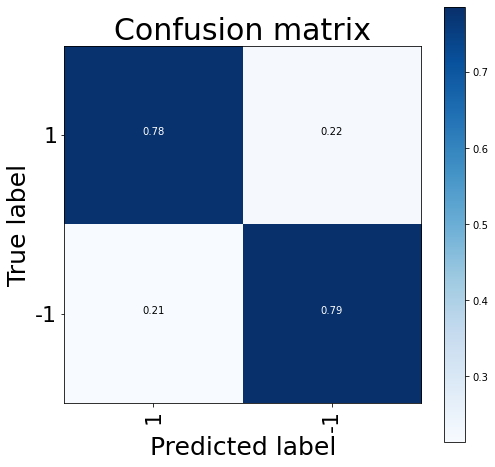

In [157]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=df_train.polarity.unique(), title="Confusion matrix")
plt.show()

# Classification Report

In [72]:
print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

          -1       0.78      0.78      0.78    140130
           1       0.78      0.79      0.78    139870

    accuracy                           0.78    280000
   macro avg       0.78      0.78      0.78    280000
weighted avg       0.78      0.78      0.78    280000



In [73]:
accuracy_score(y_test_1d, y_pred_1d)

0.7833285714285714

# Save The Models

In [74]:
model.save("model.h5")
w2v_model.save("model.w2v")
pickle.dump(tokenizer, open("tokenizer.pkl", "wb"), protocol=0)
pickle.dump(encoder, open("encoder.pkl", "wb"), protocol=0)

2022-01-09 09:16:17,772 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'model.w2v', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-01-09T09:16:17.772868', 'gensim': '4.1.2', 'python': '3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.17763-SP0', 'event': 'saving'}
2022-01-09 09:16:17,788 : INFO : not storing attribute cum_table
2022-01-09 09:16:18,932 : INFO : saved model.w2v


## Predictions on tweet_sentiment_test:

## Load The Data

In [177]:
test_df=pd.read_csv('C:\\Users\\Acc\\Desktop\\Majdal\\Machine learning\\assignment 3\\tweet_sentiment_test.zip')

In [178]:
test_df.head(20)

,tweet_id,tweet
0,1557375693,"@conkerjo The voice of reason says fix it, bec..."
1,2193820060,@slmar #lawnmothering Its been raining all mo...
2,2176629873,Walking with ma brothers now
3,1963869593,@candicotton not so good
4,1469943723,had an interesting night to say the least
5,2283293318,@lilstanleymama I hardly see her anymore like ...
6,2065993609,just came from spa
7,1565260664,@MissPrecious2 how come?
8,2190136534,The sadness : 'agent' Nayedene &amp; I thought...
9,2066828169,"Just woke up, going to the beach and stuff"


## Preprocess The Data 

In [179]:
test_df["clean_tweet"]= test_df.tweet.apply(lambda x: preprocess(x))

## Tokenize The Data

In [180]:
test_x = pad_sequences(tokenizer.texts_to_sequences(test_df.clean_tweet), maxlen=300)

In [181]:
test_x

array([[    0,     0,     0, ...,  2171,  3351,  2420],
       [    0,     0,     0, ...,    59,  1490,    22],
       [    0,     0,     0, ...,     0,   864,   811],
       ...,
       [    0,     0,     0, ...,    24,     5,  1942],
       [    0,     0,     0, ..., 14986,   345,   346],
       [    0,     0,     0, ...,     0,   209,   905]])

## Make Predictions 

In [169]:
y_pred_test= []
scores_test = model.predict(test_x, verbose=1, batch_size=8000)
y_pred_test = [decode_sentiment(score) for score in scores_test]

25/25 [==============================] - 312s 12s/step


In [170]:
y_pred_test[:10]

[1, 1, -1, 1, 1, 1, -1, 1, 1, 1]

In [187]:
scores_test

array([[0.78036857],
       [0.7347257 ],
       [0.00916147],
       ...,
       [0.6168894 ],
       [0.789742  ],
       [0.08527008]], dtype=float32)

## Add Predicted Polarity & Score columns to the Test Set

In [189]:
final_df=pd.DataFrame (y_pred_test, columns = ['Predicted_Polarity'])

In [183]:
test_df['Predicted_Polarity']=final_df

In [184]:
test_df.head(20)

,tweet_id,tweet,clean_tweet,Predicted_Polarity
0,1557375693,"@conkerjo The voice of reason says fix it, bec...",voice reason says fix come back bite arse launch,1
1,2193820060,@slmar #lawnmothering Its been raining all mo...,lawnmothering raining morning good call turtle...,1
2,2176629873,Walking with ma brothers now,walking brothers,-1
3,1963869593,@candicotton not so good,good,1
4,1469943723,had an interesting night to say the least,interesting night say least,1
5,2283293318,@lilstanleymama I hardly see her anymore like ...,hardly see anymore like moved,1
6,2065993609,just came from spa,came spa,-1
7,1565260664,@MissPrecious2 how come?,come,1
8,2190136534,The sadness : 'agent' Nayedene &amp; I thought...,sadness agent nayedene amp thought turns scam ...,1
9,2066828169,"Just woke up, going to the beach and stuff",woke going beach stuff,1


In [185]:
test_df.tail(20)

,tweet_id,tweet,clean_tweet,Predicted_Polarity
199980,1692257508,@scotsmanstuart well....you should be home now...,well home woot still sick seem shake hanging,1
199981,1995594916,@snarkylady Dollar Tree w/ child in tow will d...,dollar tree w child tow every time,-1
199982,1552035680,@Hapson @PaulDale67 it's coming along nicely I...,pauldale67 coming along nicely part well keepi...,1
199983,2245572684,@ncullura I know the old him is dead and gone...,know old dead gone,-1
199984,2014990177,@siwhitehouse I'll let you know when I've fi...,let know finished season 1,1
199985,1835283155,@paulakahumbu thought #geocashe had something ...,thought geocashe something geocoding mapping apps,1
199986,2176400518,@RaraACTIVE hehee. and whens your next chapter...,hehee whens next chapter,1
199987,2061711702,Escutando We All Rock Along - The Maine. E ten...,escutando rock along maine e tentando fazer me...,-1
199988,1824505078,@Rawrrgasmic thankfully that has never happene...,thankfully never happened imagine weird situat...,1
199989,2055354661,@Rob_Kemp searched everywhere I can think of m...,searched everywhere think mate nothing,-1


In [190]:
final_df_1=pd.DataFrame (scores_test, columns = ['Score'])

In [191]:
test_df['Score']=final_df_1

In [193]:
test_df.head(50)

,tweet_id,tweet,clean_tweet,Predicted_Polarity,Score
0,1557375693,"@conkerjo The voice of reason says fix it, bec...",voice reason says fix come back bite arse launch,1,0.780369
1,2193820060,@slmar #lawnmothering Its been raining all mo...,lawnmothering raining morning good call turtle...,1,0.734726
2,2176629873,Walking with ma brothers now,walking brothers,-1,0.009161
3,1963869593,@candicotton not so good,good,1,0.735245
4,1469943723,had an interesting night to say the least,interesting night say least,1,0.734191
5,2283293318,@lilstanleymama I hardly see her anymore like ...,hardly see anymore like moved,1,0.839654
6,2065993609,just came from spa,came spa,-1,0.003984
7,1565260664,@MissPrecious2 how come?,come,1,0.638774
8,2190136534,The sadness : 'agent' Nayedene &amp; I thought...,sadness agent nayedene amp thought turns scam ...,1,0.945543
9,2066828169,"Just woke up, going to the beach and stuff",woke going beach stuff,1,0.737542


In [195]:
test_df.to_csv("sentiment_300991890.csv")

## Save The result 

In [1]:
#saving just tweet_id and predicted polarity columns as the question needs
file=pd.read_csv("sentiment_300991890.csv")

In [2]:
file = file[['tweet_id','Predicted_Polarity']]

In [3]:
file.head()

,tweet_id,Predicted_Polarity
0,1557375693,1
1,2193820060,1
2,2176629873,-1
3,1963869593,1
4,1469943723,1


In [4]:
file.to_csv("sentiment_300991890.csv")